In [1]:
# install dependencies and select solver
%pip install -q amplpy numpy matplotlib scikit-learn yfinance

SOLVER = "highs"

from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["highs"],  # modules to install
    license_uuid="default",  # license to use
)  # instantiate AMPL object and register magics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.3 MB/s eta 0:00:00
Using default Community Edition License for Colab. Get yours at: https://ampl.com/ce
Licensed to AMPL Community Edition License for the AMPL Model Colaboratory (https://colab.ampl.com).


In [2]:
%pip install yfinance --upgrade -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.3 MB/s eta 0:00:00


In [3]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime as datetime
import yfinance as yf

[*********************100%%**********************]  30 of 30 completed


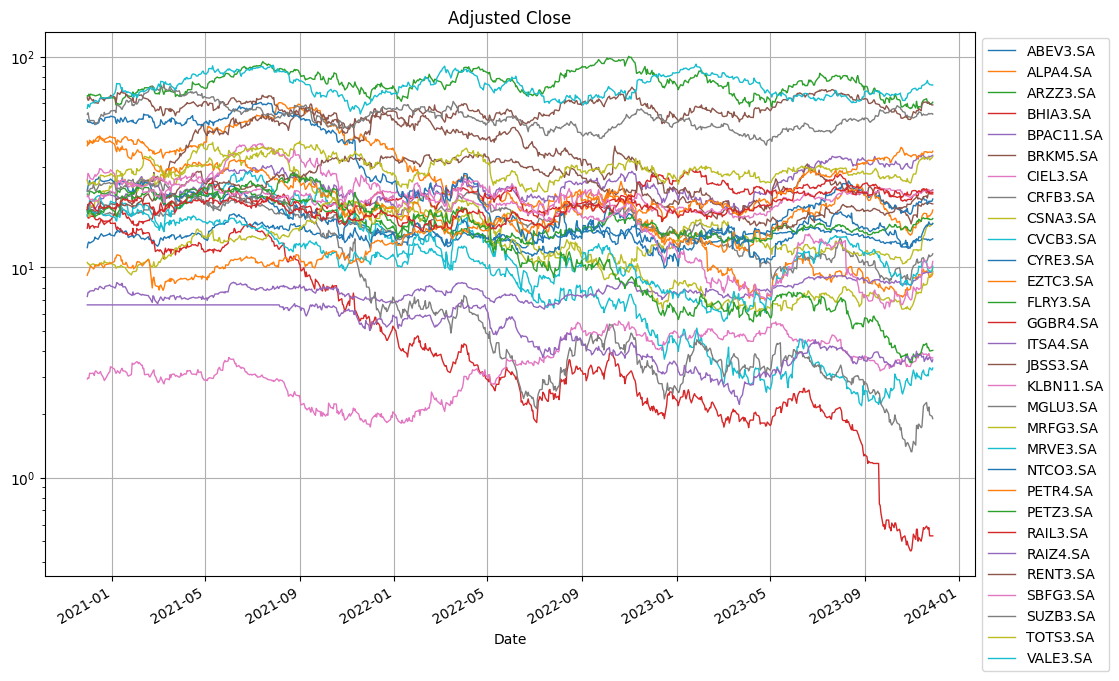

In [4]:
# list of stock symbols
tickers = [
    "PETR4.SA",
    "MRFG3.SA",
    "CSNA3.SA",
    "RAIZ4.SA",
    "VALE3.SA",
    "ARZZ3.SA",
    "NTCO3.SA",
    "MRVE3.SA",
    "MGLU3.SA",
    "CIEL3.SA",
    "RENT3.SA",
    "CYRE3.SA",
    "ITSA4.SA",
    "BPAC11.SA",
    "CRFB3.SA",
    "ALPA4.SA",
    "FLRY3.SA",
    "RAIL3.SA",
    "EZTC3.SA",
    "BRKM5.SA",
    "SUZB3.SA",
    "KLBN11.SA",
    "ABEV3.SA",
    "GGBR4.SA",
    "BHIA3.SA",
    "PETZ3.SA",
    "SBFG3.SA",
    "CVCB3.SA",
    "JBSS3.SA",
    "TOTS3.SA",
]

# number of years
n_years = 3.0

# historical period
end_date = datetime.datetime.today().date()
start_date = end_date - datetime.timedelta(round(n_years * 365))

assets = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

assets.fillna(method="bfill", inplace=True)
assets.fillna(method="ffill", inplace=True)

assets.plot(logy=True, figsize=(12, 8), grid=True, lw=1, title="Adjusted Close")
plt.legend(bbox_to_anchor=(1.0, 1.0))

[*********************100%%**********************]  30 of 30 completed


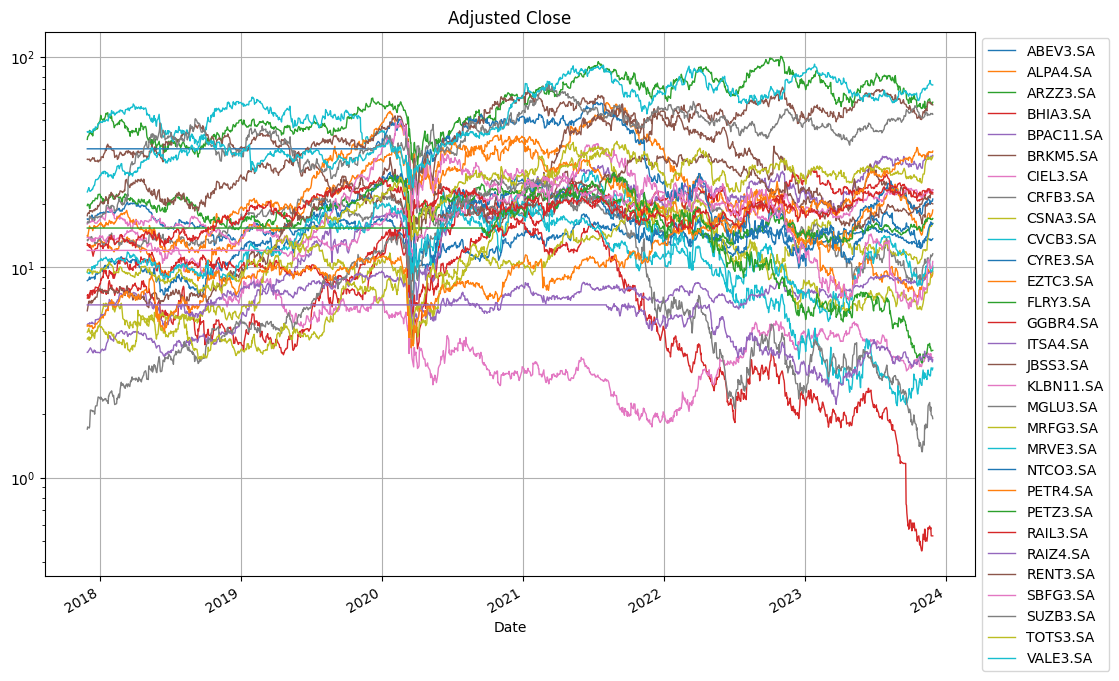

In [5]:
# list of stock symbols
tickers = [
    "PETR4.SA",
    "MRFG3.SA",
    "CSNA3.SA",
    "RAIZ4.SA",
    "VALE3.SA",
    "ARZZ3.SA",
    "NTCO3.SA",
    "MRVE3.SA",
    "MGLU3.SA",
    "CIEL3.SA",
    "RENT3.SA",
    "CYRE3.SA",
    "ITSA4.SA",
    "BPAC11.SA",
    "CRFB3.SA",
    "ALPA4.SA",
    "FLRY3.SA",
    "RAIL3.SA",
    "EZTC3.SA",
    "BRKM5.SA",
    "SUZB3.SA",
    "KLBN11.SA",
    "ABEV3.SA",
    "GGBR4.SA",
    "BHIA3.SA",
    "PETZ3.SA",
    "SBFG3.SA",
    "CVCB3.SA",
    "JBSS3.SA",
    "TOTS3.SA",
]

# number of years
n_years = 6.0

# historical period
end_date = datetime.datetime.today().date()
start_date = end_date - datetime.timedelta(round(n_years * 365))

assets = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

assets.fillna(method="bfill", inplace=True)
assets.fillna(method="ffill", inplace=True)

assets.plot(logy=True, figsize=(12, 8), grid=True, lw=1, title="Adjusted Close")
plt.legend(bbox_to_anchor=(1.0, 1.0))

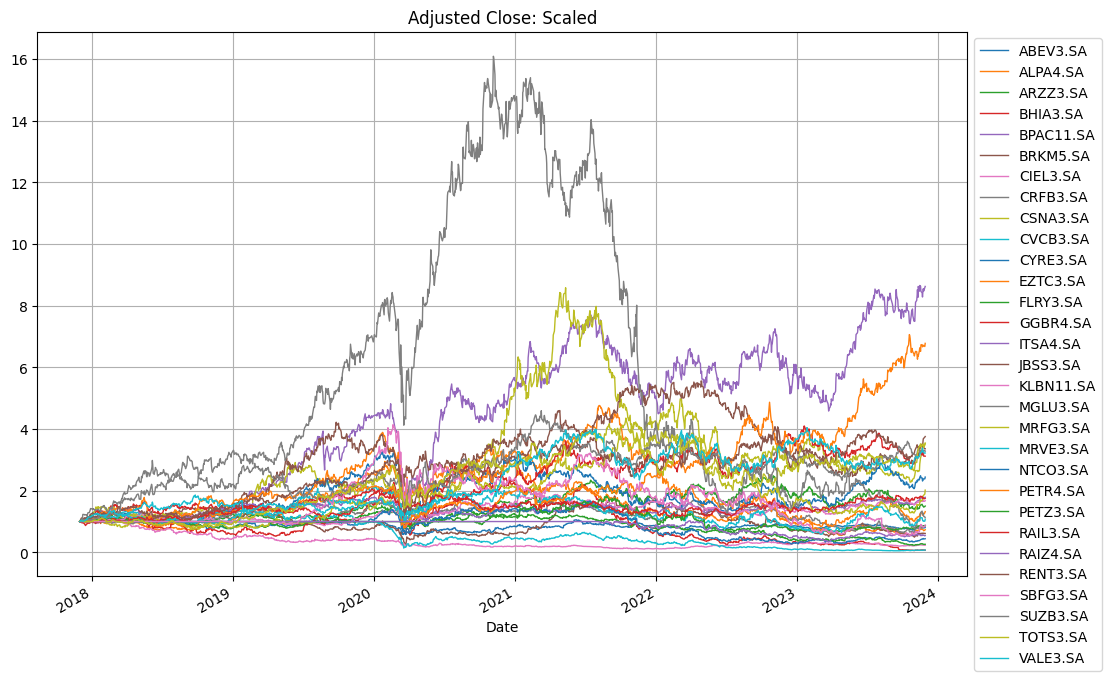

In [6]:
# scaled asset prices
assets_scaled = assets.div(assets.iloc[0])
assets_scaled.plot(figsize=(12, 8), grid=True, lw=1, title="Adjusted Close: Scaled")
plt.legend(bbox_to_anchor=(1.0, 1.0))

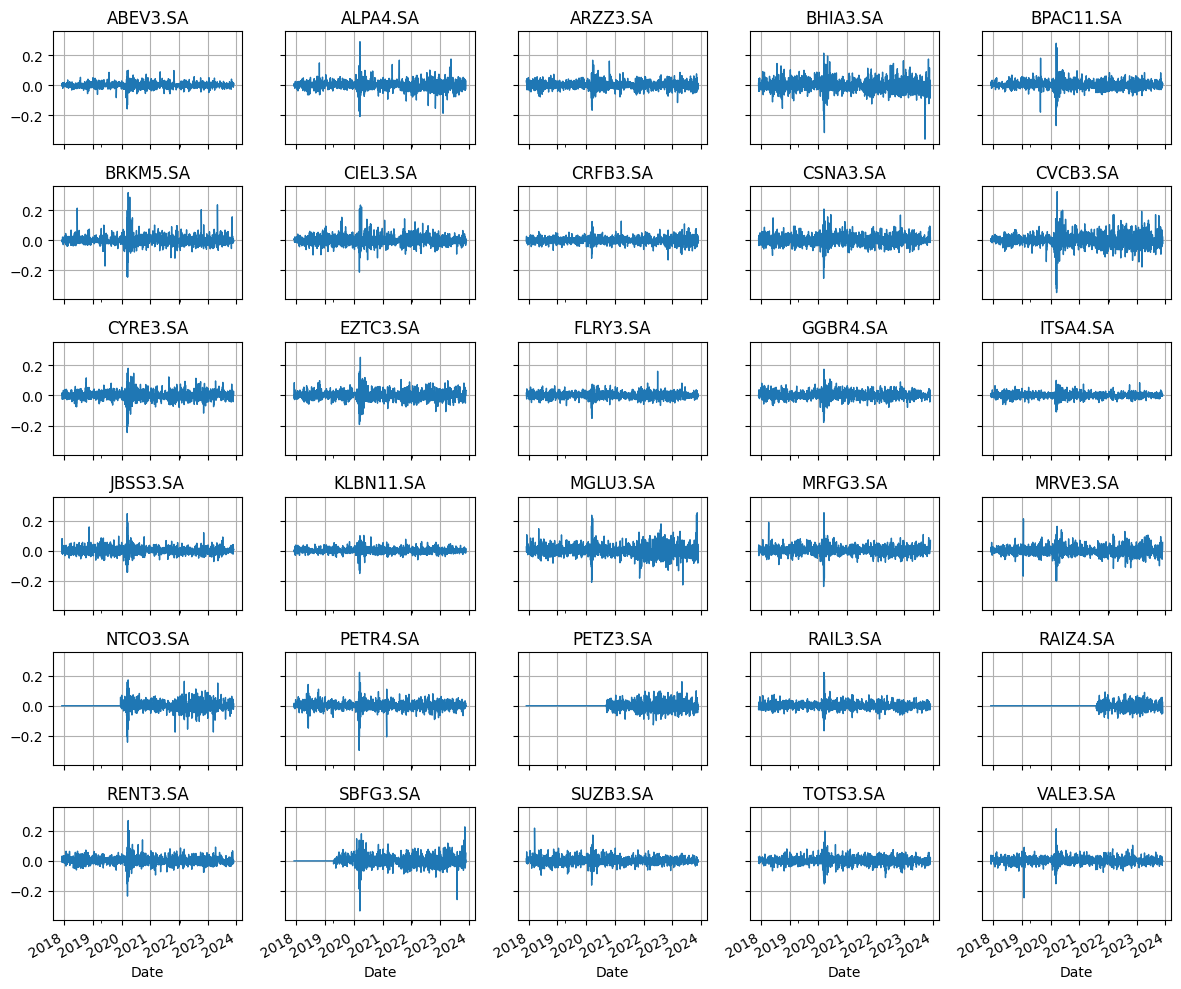

In [7]:
# daily returns
daily_returns = assets.diff()[1:] / assets.shift(1)[1:]

fig, ax = plt.subplots(6, 5, figsize=(12, 10), sharex=True, sharey=True)
for a, s in zip(ax.flatten(), sorted(daily_returns.columns)):
    daily_returns[s].plot(ax=a, lw=1, title=s, grid=True)

plt.tight_layout()

            ABEV3.SA  ALPA4.SA  ARZZ3.SA  BHIA3.SA  BPAC11.SA  BRKM5.SA  \
Date                                                                      
2017-12-01 -0.005350  0.009036  0.027916  0.012228   0.000000 -0.003745   
2017-12-04  0.000973  0.007229  0.047176 -0.028533   0.022105 -0.001780   
2017-12-05 -0.000486 -0.001807  0.060377  0.012228   0.026316  0.001618   
2017-12-06  0.007296  0.007229  0.103874  0.027174   0.034210 -0.003819   
2017-12-07  0.007782 -0.000602  0.071197  0.013587   0.041579 -0.016053   
...              ...       ...       ...       ...        ...       ...   
2023-11-22 -0.199088 -0.258697  0.503947 -0.922171   7.455541 -0.383988   
2023-11-23 -0.200269 -0.279945  0.498265 -0.920806   7.549407 -0.378466   
2023-11-24 -0.209712 -0.296471  0.468121 -0.927633   7.473299 -0.380000   
2023-11-27 -0.198498 -0.282306  0.485911 -0.927633   7.587460 -0.385829   
2023-11-28 -0.194367 -0.262632  0.502218 -0.927633   7.625514 -0.386443   

            CIEL3.SA  CR

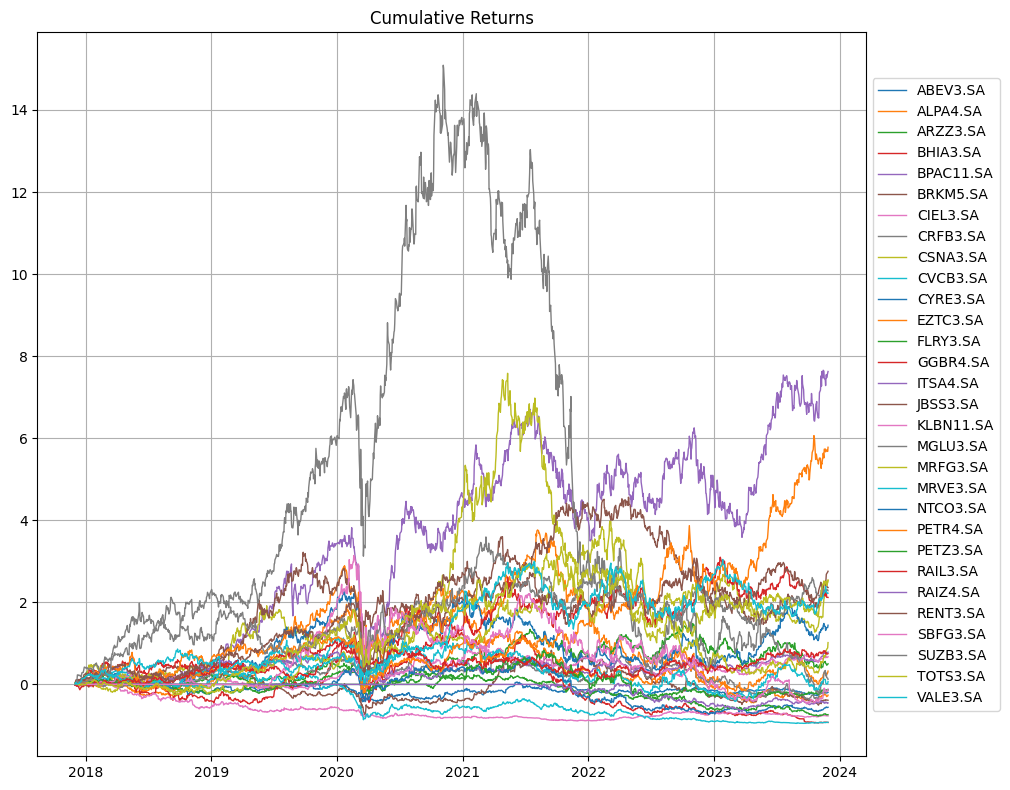

In [8]:
import seaborn as sns  # Import seaborn to use color palettes

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1
print(cumulative_returns)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Use the 'tab10' color palette from seaborn to ensure different colors for each asset
sns.set_palette("tab10")

# Plot each asset with a different color
for column in cumulative_returns.columns:
    ax.plot(cumulative_returns.index, cumulative_returns[column], lw=1, label=column)

# Add the legend to the right of the plot
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Find the best (max) and worst (min) performing assets
best_performer = cumulative_returns.idxmax(axis=1).iloc[-1]
worst_performer = cumulative_returns.idxmin(axis=1).iloc[-1]

# Print the best and worst performing assets
print(f"The best performer is: {best_performer}")
print(f"The worst performer is: {worst_performer}")

# Sort all assets by performance (ascending order)
sorted_assets = cumulative_returns.iloc[-1].sort_values()

# Print all assets sorted
print("\nAll assets sorted by performance:")
print(sorted_assets)

plt.title("Cumulative Returns")
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin of the plot
plt.show()


## **O grupo de maior retorno cumulativo foi a Petrobras SA. enquanto o de menor retorno foi o do grupo Casas Bahia**

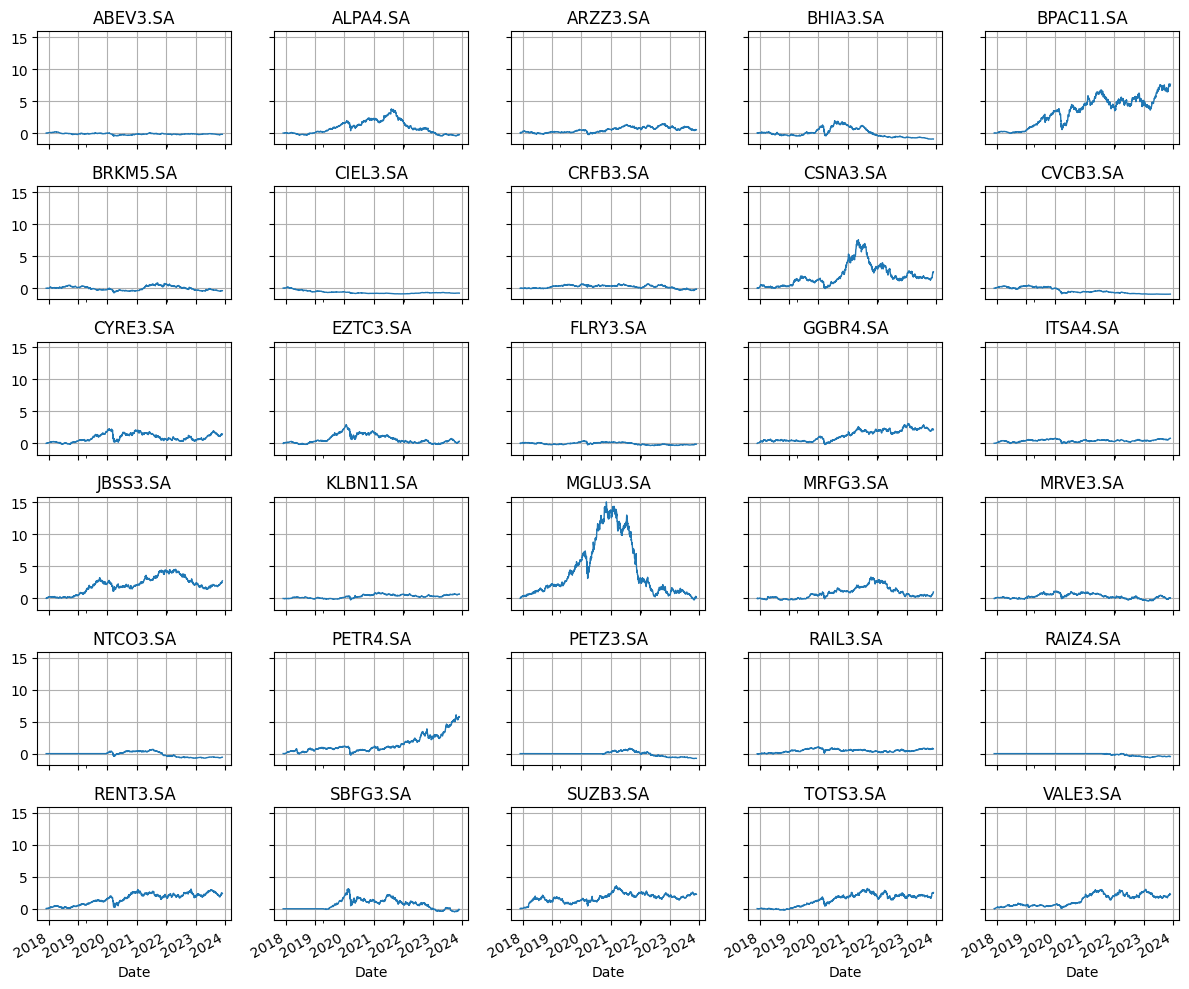

In [9]:
fig, ax = plt.subplots(6, 5, figsize=(12, 10), sharex=True, sharey=True)

# Iterar sobre os subgráficos e ativos
for a, s in zip(ax.flatten(), sorted(daily_returns.columns)):
    # Plotar os retornos acumulados
    cumulative_returns[s].plot(ax=a, lw=1, title=s, grid=True)

plt.tight_layout()
plt.show()

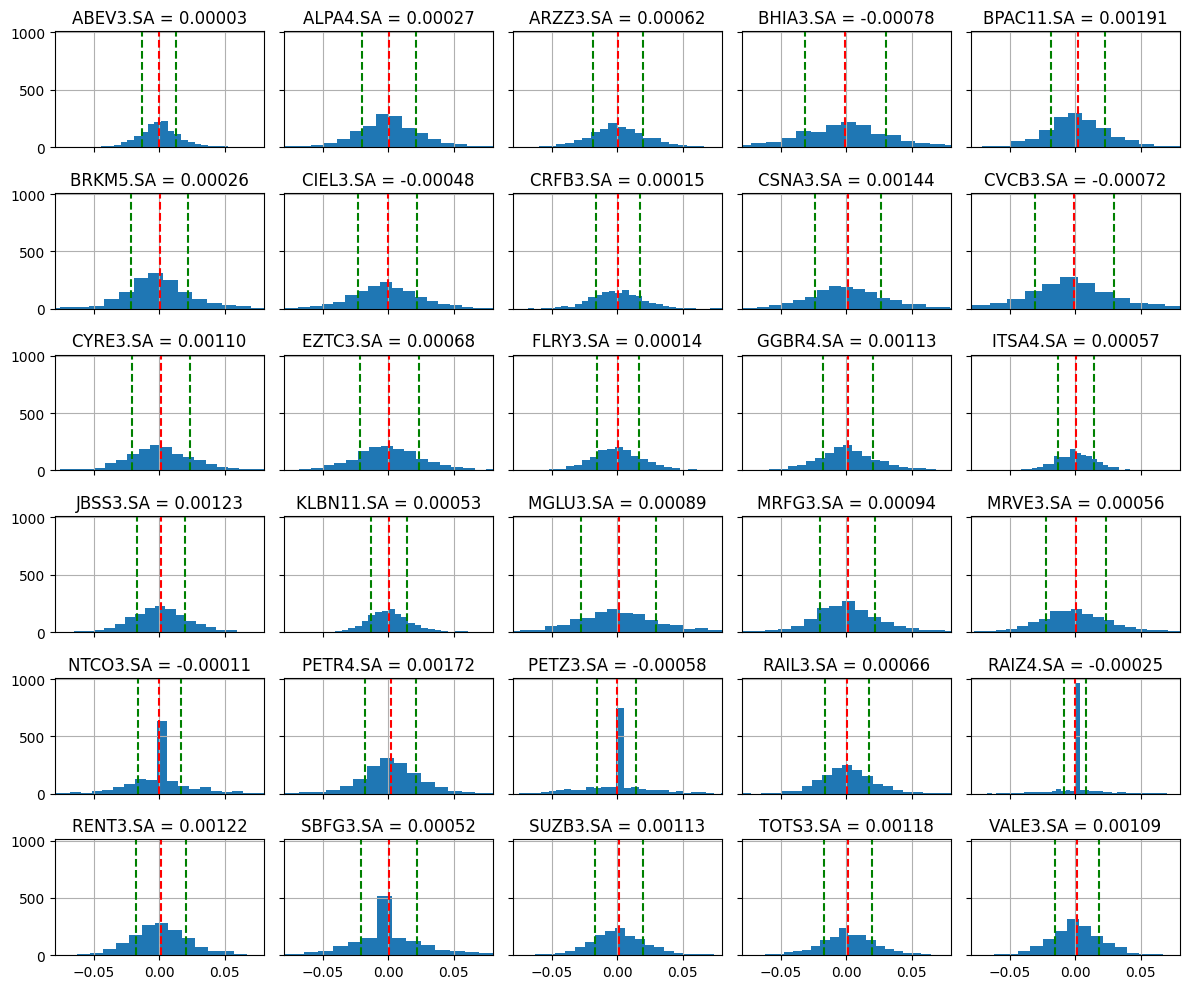

In [11]:
# distributions of returns

daily_returns = assets.diff()[1:] / assets.shift(1)[1:]

fig, ax = plt.subplots(6, 5, figsize=(12, 10), sharex=True, sharey=True)
ax = ax.flatten()

for a, s in zip(ax.flatten(), daily_returns.columns):
    daily_returns[s].hist(ax=a, lw=1, grid=True, bins=50)
    mean_return = daily_returns[s].mean()
    mean_absolute_deviation = abs((daily_returns[s] - mean_return)).mean()
    a.set_title(f"{s} = {mean_return:0.5f}")
    a.set_xlim(-0.08, 0.08)
    a.axvline(mean_return, color="r", linestyle="--")
    a.axvline(mean_return + mean_absolute_deviation, color="g", linestyle="--")
    a.axvline(mean_return - mean_absolute_deviation, color="g", linestyle="--")

plt.tight_layout()

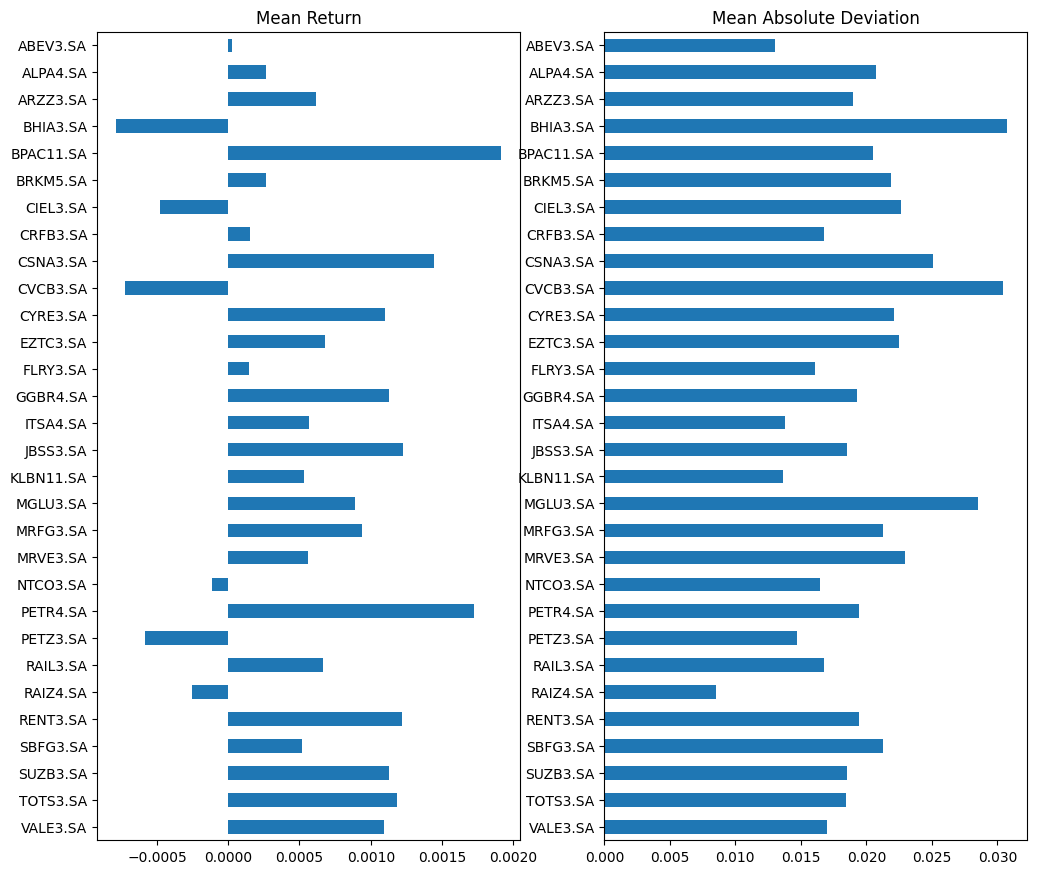

In [12]:
# bar charts of mean return and mean absolute deviation in returns

daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
mean_return = daily_returns.mean()
mean_absolute_deviation = abs(daily_returns - mean_return).mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 0.35 * len(daily_returns.columns)))
mean_return.plot(kind="barh", ax=ax[0], title="Mean Return")
ax[0].invert_yaxis()
mean_absolute_deviation.plot(kind="barh", ax=ax[1], title="Mean Absolute Deviation")
ax[1].invert_yaxis()

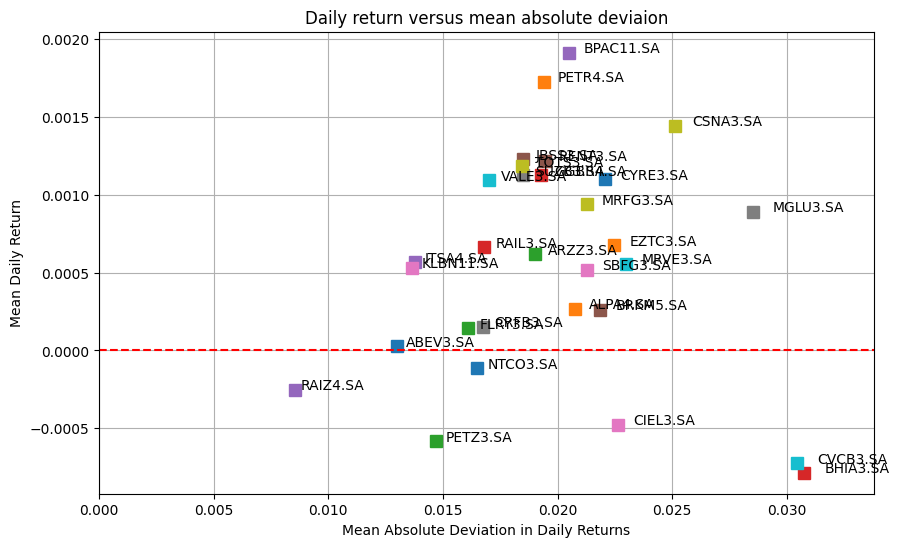

In [13]:
# plot return vs risk
daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
mean_return = daily_returns.mean()
mean_absolute_deviation = abs(daily_returns - mean_return).mean()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for s in assets.keys():
    ax.plot(mean_absolute_deviation[s], mean_return[s], "s", ms=8)
    ax.text(mean_absolute_deviation[s] * 1.03, mean_return[s], s)

ax.set_xlim(0, 1.1 * mean_absolute_deviation.max())
ax.axhline(0, color="r", linestyle="--")
ax.set_title("Daily return versus mean absolute deviaion")
ax.set_xlabel("Mean Absolute Deviation in Daily Returns")
ax.set_ylabel("Mean Daily Return")
ax.grid(True)

In [14]:
%%writefile mad_portfolio.mod

param R default 0;
param w_lb default 0;
param w_ub default 1;

set ASSETS;
set TIME;

param daily_returns{TIME, ASSETS};
param mean_return{ASSETS};

var w{ASSETS};
var u{TIME} >= 0;
var v{TIME} >= 0;

minimize MAD: sum{t in TIME}(u[t] + v[t]) / card(TIME);

s.t. portfolio_returns {t in TIME}:
    u[t] - v[t] == sum{j in ASSETS}(w[j] * (daily_returns[t, j] - mean_return[j]));

s.t. sum_of_weights: sum{j in ASSETS} w[j] == 1;

s.t. mean_portfolio_return: sum{j in ASSETS}(w[j] * mean_return[j]) >= R;

s.t. no_short {j in ASSETS}: w[j] >= w_lb;

s.t. diversify {j in ASSETS}: w[j] <= w_ub;

Writing mad_portfolio.mod


HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.00970560185
1812 simplex iterations
0 barrier iterations
 
Weight lower bound                0.000
Weight upper bound                0.200
Fraction of portfolio invested     1.000
Required portfolio daily return    0.00100
Portfolio mean daily return        0.00100
Portfolio mean absolute deviation  0.00971


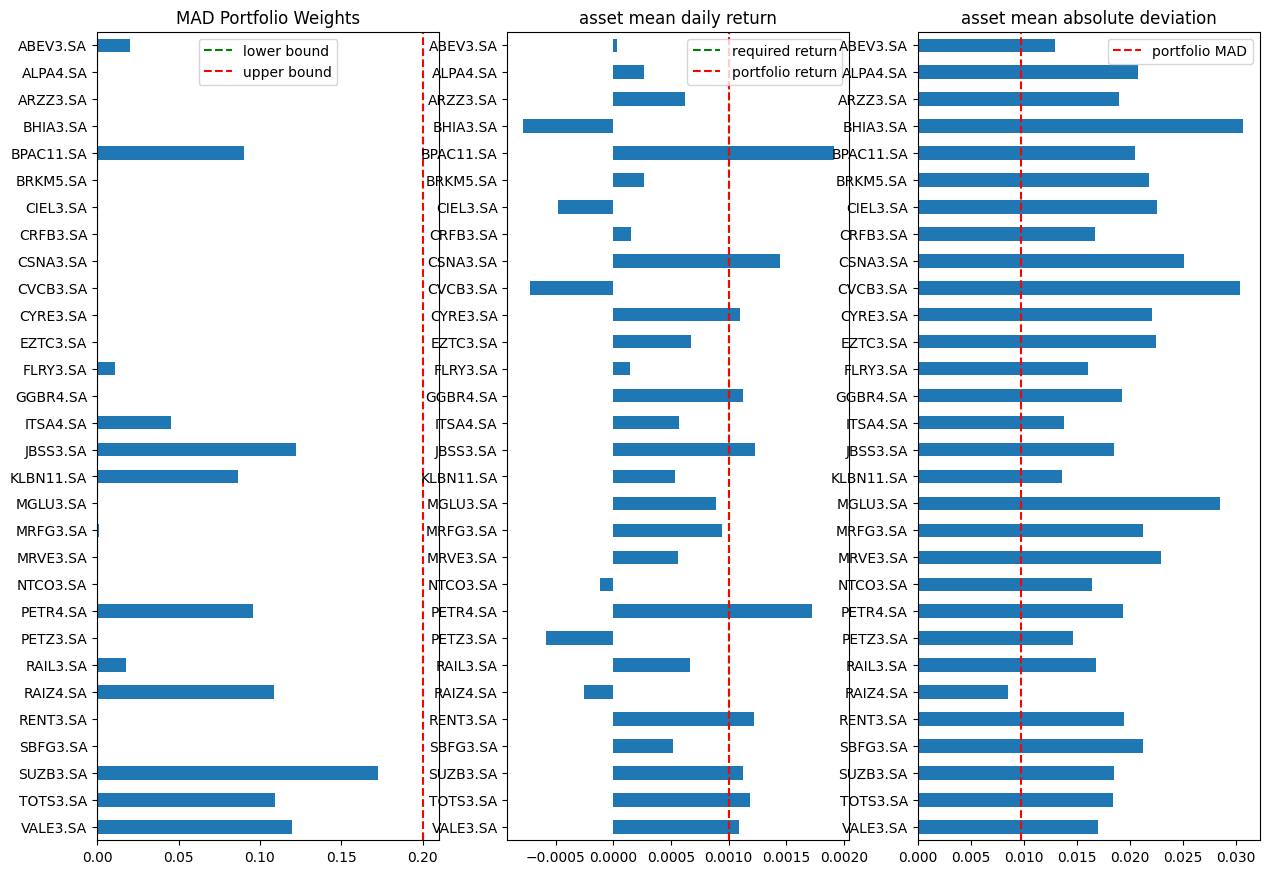

In [15]:
def mad_portfolio(assets):
    daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
    mean_return = daily_returns.mean()

    daily_returns["Date"] = daily_returns.index.format()
    daily_returns.set_index("Date", inplace=True)

    ampl = AMPL()
    ampl.read("mad_portfolio.mod")

    ampl.set["ASSETS"] = list(assets.columns)
    ampl.set["TIME"] = daily_returns.index.values

    ampl.param["daily_returns"] = daily_returns
    ampl.param["mean_return"] = mean_return

    return ampl


def mad_visualization(assets, m):
    mean_portfolio_return = m.get_value("sum{j in ASSETS}(w[j] * mean_return[j])")

    print(f"Weight lower bound                {m.param['w_lb'].value():0.3f}")
    print(f"Weight upper bound                {m.param['w_ub'].value():0.3f}")
    print(
        f"Fraction of portfolio invested     {m.get_value('sum{j in ASSETS} w[j]'):0.3f}"
    )
    print(f"Required portfolio daily return    {m.param['R'].value():0.5f}")
    print(f"Portfolio mean daily return        {mean_portfolio_return:0.5f}")
    print(f"Portfolio mean absolute deviation  {m.obj['MAD'].value():0.5f}")

    daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
    mean_return = daily_returns.mean()
    mean_absolute_deviation = abs(daily_returns - mean_return).mean()
    mad_portfolio_weights = m.var["w"].to_pandas()

    fig, ax = plt.subplots(1, 3, figsize=(15, 0.35 * len(daily_returns.columns)))
    mad_portfolio_weights.plot(kind="barh", ax=ax[0], title="MAD Portfolio Weights")
    ax[0].invert_yaxis()
    ax[0].axvline(m.param["w_lb"].value(), ls="--", color="g")
    ax[0].axvline(m.param["w_ub"].value(), ls="--", color="r")
    ax[0].legend(["lower bound", "upper bound"])

    mean_return.plot(kind="barh", ax=ax[1], title="asset mean daily return")
    ax[1].axvline(m.param["R"].value(), ls="--", color="g")

    ax[1].axvline(mean_portfolio_return, ls="--", color="r")
    ax[1].invert_yaxis()
    ax[1].legend(["required return", "portfolio return"])

    mean_absolute_deviation.plot(
        kind="barh", ax=ax[2], title="asset mean absolute deviation"
    )
    ax[2].axvline(m.obj["MAD"].value(), ls="--", color="r")
    ax[2].legend(["portfolio MAD"])
    ax[2].invert_yaxis()

m = mad_portfolio(assets)
m.param["w_lb"] = 0
m.param["w_ub"] = 0.2
m.param["R"] = 0.001
m.option["solver"] = SOLVER
m.solve()
mad_visualization(assets, m)

Ao definir o limitante superior de diversificação (w_ub), estamos estabelecendo um critério crucial para a alocação de ativos no portfólio. Esse parâmetro representa a proporção máxima que qualquer ativo individual pode ter no portfólio, limitando a concentração e incentivando a diversificação.

Quando o w_ub é definido em um valor baixo, como 0.2, estamos restringindo significativamente a participação de cada ativo, promovendo uma distribuição mais equilibrada dos recursos. Isso é benéfico para reduzir a exposição a riscos específicos de ativos e promover a estabilidade do portfólio, mas pode resultar em retornos potencialmente mais modestos.

Por outro lado, ao aumentar o w_ub, permitimos que ativos individuais tenham uma participação mais substancial no portfólio. Isso pode resultar em maior potencial de retorno, mas também aumenta a exposição a riscos específicos desses ativos. A escolha do valor de w_ub reflete, portanto, um equilíbrio entre a busca por retornos mais altos e a gestão prudente do risco.

É crucial considerar as metas e a aversão ao risco do investidor ao ajustar o w_ub. Um valor mais alto pode ser apropriado para investidores dispostos a assumir maior risco em busca de retornos mais elevados, enquanto um valor mais baixo é indicado para aqueles que valorizam a preservação de capital e a minimização de riscos específicos.

Essa flexibilidade no limitante superior de diversificação permite a adaptação do modelo às preferências e objetivos específicos do investidor, tornando a otimização de portfólio uma ferramenta poderosa e personalizável.

## **Cenário 1: Diversificação Mínima**


U é definido como um valor muito alto, ou até mesmo infinito, permitindo concentração total em um único ativo.

## **Cenário 2: Diversificação Controlada**

U é definido em um valor moderado, forçando o otimizador a alocar o capital em vários ativos, promovendo a diversificação.

## **Cenário 3: Restrição Sem Venda a Descoberto**

A restrição sem venda a descoberto é imposta, significando que os pesos dos ativos no portfólio devem ser não negativos.

Ao comparar os resultados desses cenários, você pode observar diferenças significativas nos portfólios otimizados. O primeiro cenário provavelmente resultará em um portfólio altamente concentrado, enquanto o segundo e o terceiro cenários levarão a portfólios mais diversificados.

HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.00970560185
1812 simplex iterations
0 barrier iterations
 

Resultados para w_ub = 0.2:
Weight lower bound                0.000
Weight upper bound                0.200
Fraction of portfolio invested     1.000
Required portfolio daily return    0.00100
Portfolio mean daily return        0.00100
Portfolio mean absolute deviation  0.00971


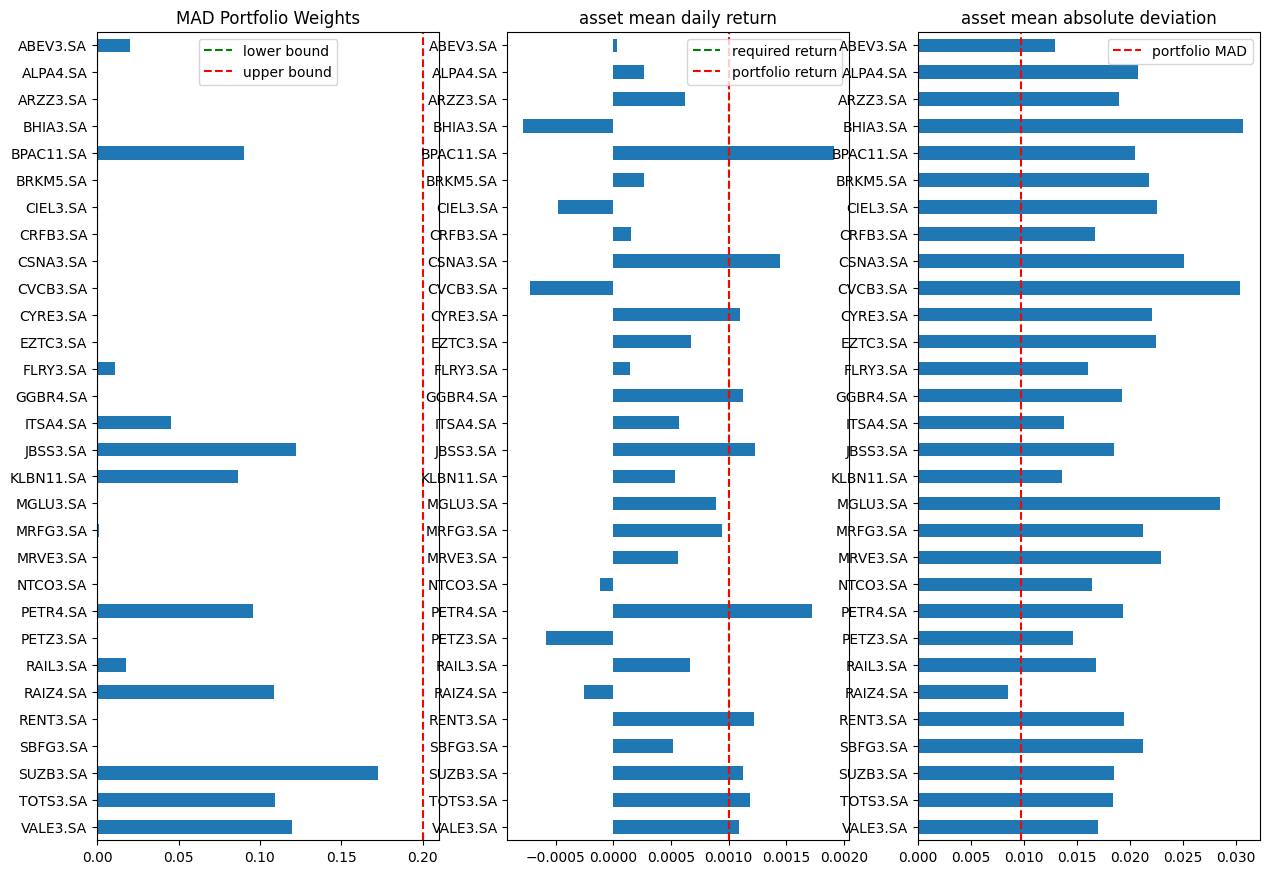

HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.00970560185
1785 simplex iterations
0 barrier iterations
 

Resultados para w_ub = 0.5:
Weight lower bound                0.000
Weight upper bound                0.500
Fraction of portfolio invested     1.000
Required portfolio daily return    0.00100
Portfolio mean daily return        0.00100
Portfolio mean absolute deviation  0.00971


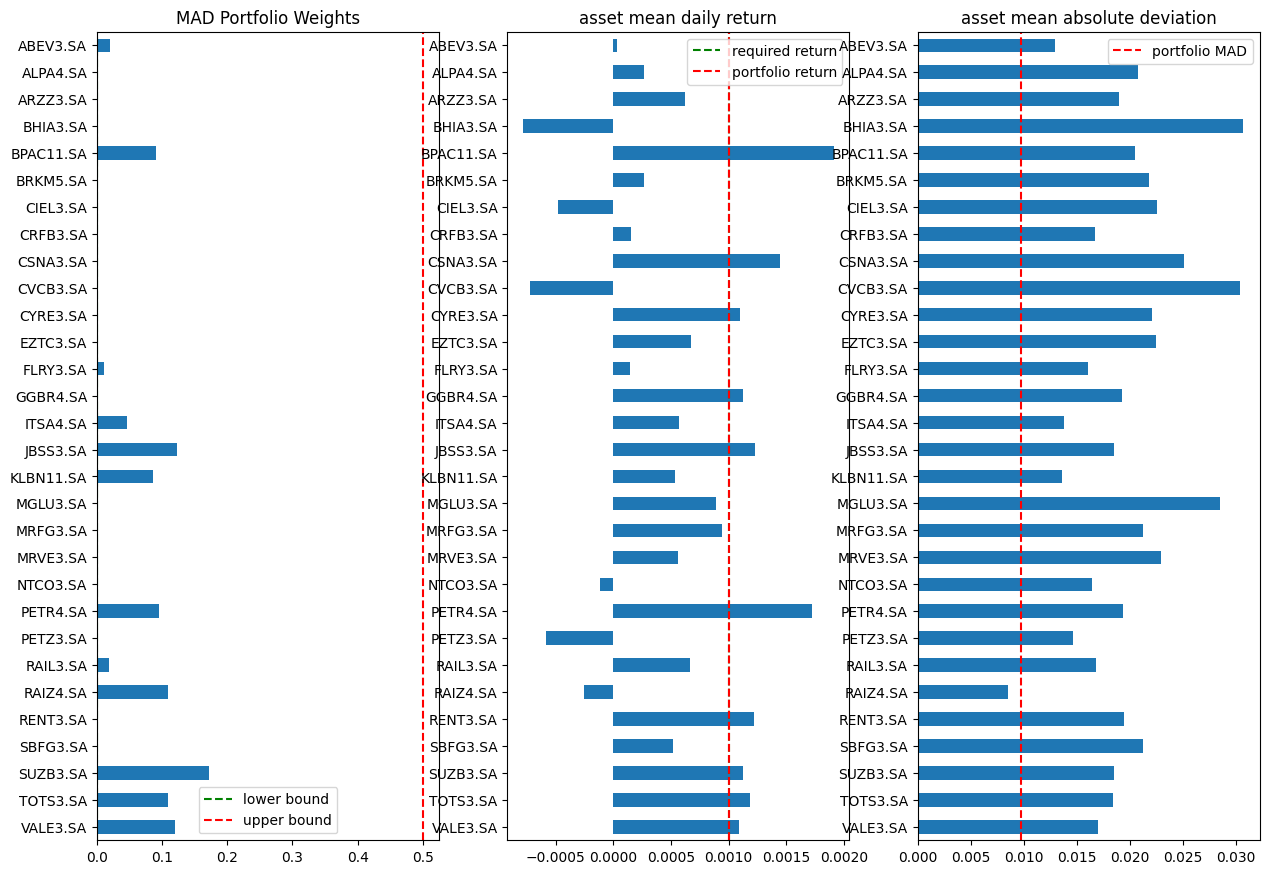

HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.00970560185
1790 simplex iterations
0 barrier iterations
 

Resultados para w_ub = 0.8:
Weight lower bound                0.000
Weight upper bound                0.800
Fraction of portfolio invested     1.000
Required portfolio daily return    0.00100
Portfolio mean daily return        0.00100
Portfolio mean absolute deviation  0.00971


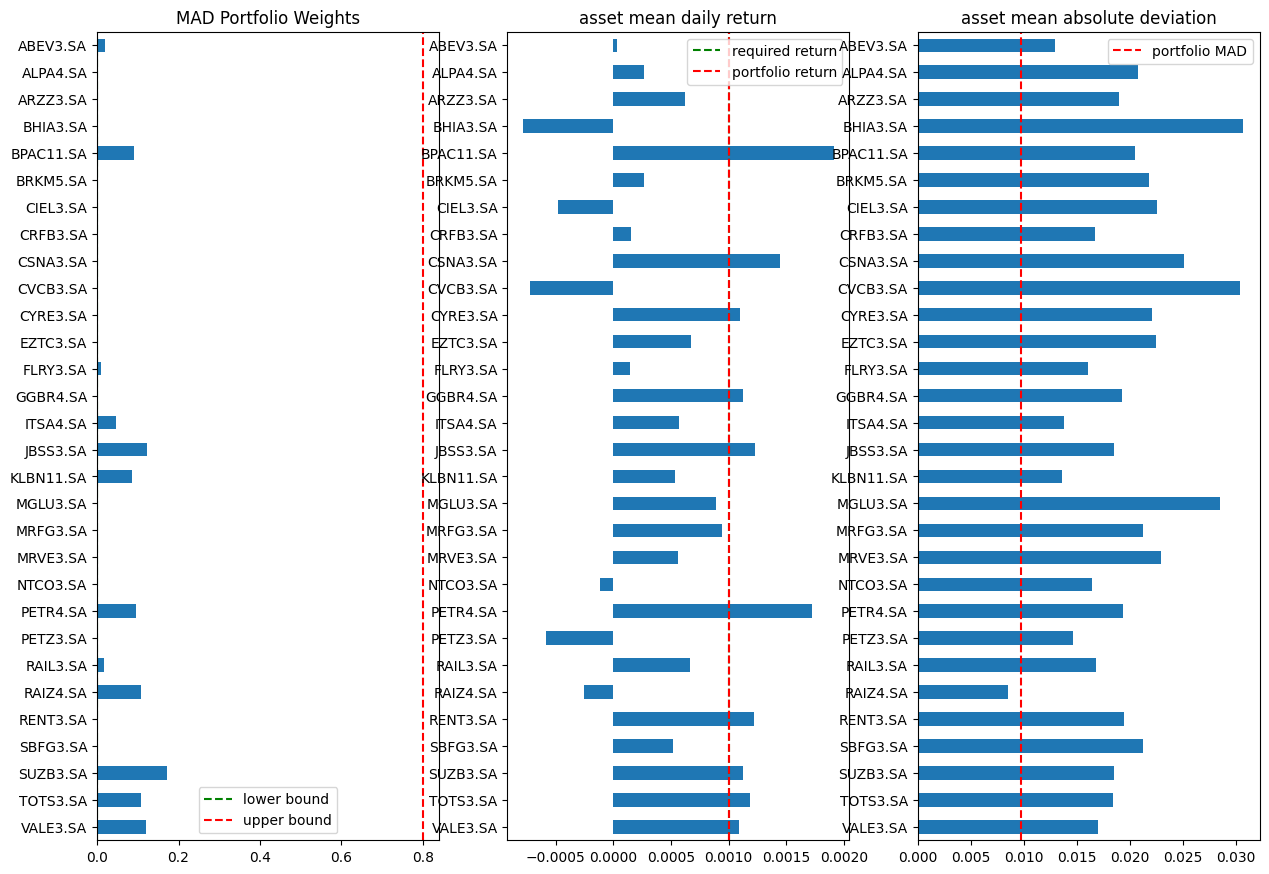

HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.00970560185
1801 simplex iterations
0 barrier iterations
 

Resultados para w_ub = 1.0:
Weight lower bound                0.000
Weight upper bound                1.000
Fraction of portfolio invested     1.000
Required portfolio daily return    0.00100
Portfolio mean daily return        0.00100
Portfolio mean absolute deviation  0.00971


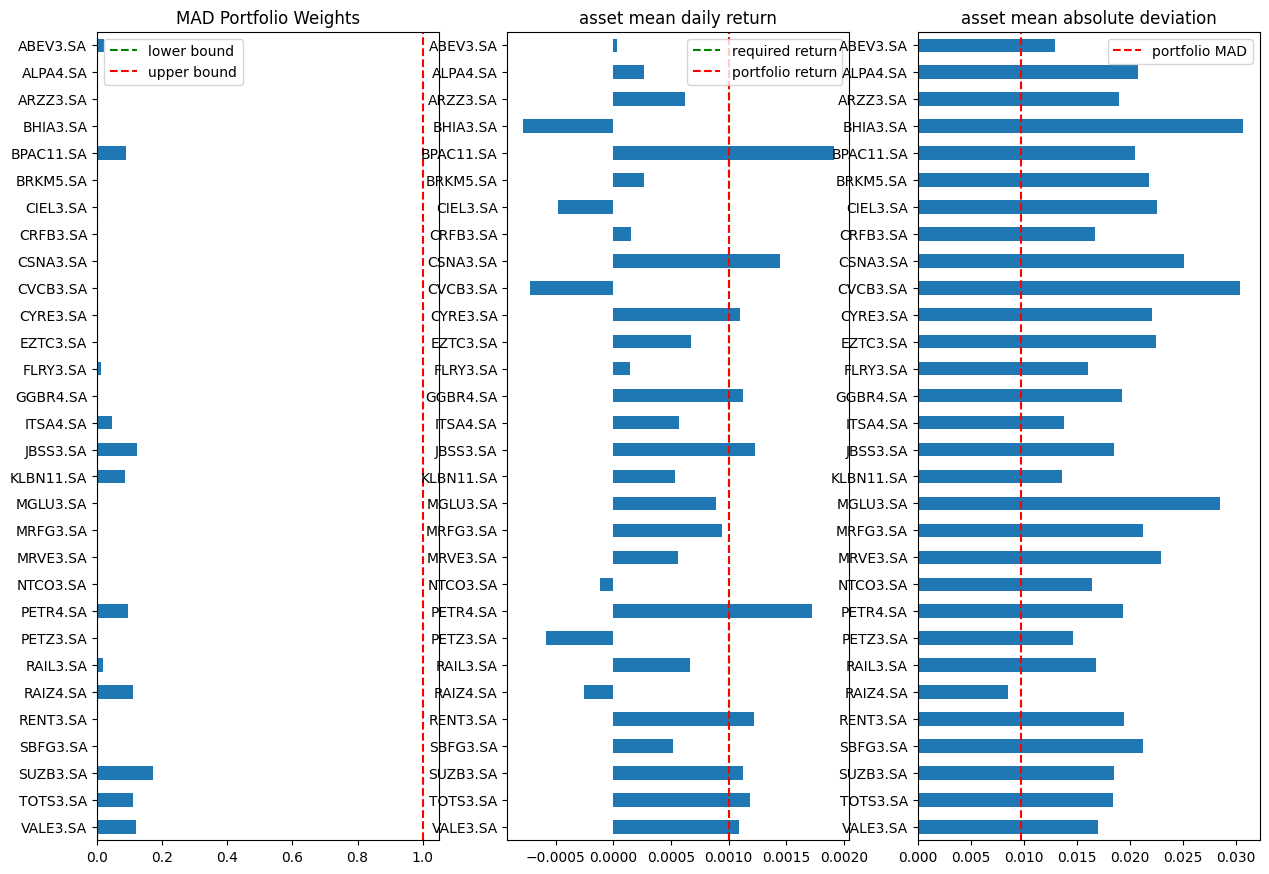

In [16]:
def mad_portfolio(assets):
    daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
    mean_return = daily_returns.mean()

    daily_returns["Date"] = daily_returns.index.format()
    daily_returns.set_index("Date", inplace=True)

    ampl = AMPL()
    ampl.read("mad_portfolio.mod")

    ampl.set["ASSETS"] = list(assets.columns)
    ampl.set["TIME"] = daily_returns.index.values

    ampl.param["daily_returns"] = daily_returns
    ampl.param["mean_return"] = mean_return

    return ampl


def mad_visualization(assets, m):
    mean_portfolio_return = m.get_value("sum{j in ASSETS}(w[j] * mean_return[j])")

    print(f"Weight lower bound                {m.param['w_lb'].value():0.3f}")
    print(f"Weight upper bound                {m.param['w_ub'].value():0.3f}")
    print(
        f"Fraction of portfolio invested     {m.get_value('sum{j in ASSETS} w[j]'):0.3f}"
    )
    print(f"Required portfolio daily return    {m.param['R'].value():0.5f}")
    print(f"Portfolio mean daily return        {mean_portfolio_return:0.5f}")
    print(f"Portfolio mean absolute deviation  {m.obj['MAD'].value():0.5f}")

    daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
    mean_return = daily_returns.mean()
    mean_absolute_deviation = abs(daily_returns - mean_return).mean()
    mad_portfolio_weights = m.var["w"].to_pandas()

    fig, ax = plt.subplots(1, 3, figsize=(15, 0.35 * len(daily_returns.columns)))
    mad_portfolio_weights.plot(kind="barh", ax=ax[0], title="MAD Portfolio Weights")
    ax[0].invert_yaxis()
    ax[0].axvline(m.param["w_lb"].value(), ls="--", color="g")
    ax[0].axvline(m.param["w_ub"].value(), ls="--", color="r")
    ax[0].legend(["lower bound", "upper bound"])

    mean_return.plot(kind="barh", ax=ax[1], title="asset mean daily return")
    ax[1].axvline(m.param["R"].value(), ls="--", color="g")

    ax[1].axvline(mean_portfolio_return, ls="--", color="r")
    ax[1].invert_yaxis()
    ax[1].legend(["required return", "portfolio return"])

    mean_absolute_deviation.plot(
        kind="barh", ax=ax[2], title="asset mean absolute deviation"
    )
    ax[2].axvline(m.obj["MAD"].value(), ls="--", color="r")
    ax[2].legend(["portfolio MAD"])
    ax[2].invert_yaxis()


# Loop para variar os limites superiores de diversificação
for diversification_limit in [0.2, 0.5, 0.8, 1.0]:
    # Configurar o modelo AMPL com o novo limitante superior de diversificação
    m = mad_portfolio(assets)
    m.param["w_ub"] = diversification_limit
    m.param["w_lb"] = 0
    m.param["R"] = 0.001
    m.option["solver"] = SOLVER
    # Resolver o modelo
    m.solve()

    # Exibir resultados
    print(f"\nResultados para w_ub = {diversification_limit}:")
    mad_visualization(assets, m)
    plt.show()

Error executing "solve" command:
No solver specified:  option solver is ''.

Resultados para w_ub = 0.2:
Weight lower bound                -1.000
Weight upper bound                0.200
Fraction of portfolio invested     0.000
Required portfolio daily return    0.00000
Portfolio mean daily return        0.00000
Portfolio mean absolute deviation  0.00000
Error executing "solve" command:
No solver specified:  option solver is ''.

Resultados para w_ub = 0.5:
Weight lower bound                -1.000
Weight upper bound                0.500
Fraction of portfolio invested     0.000
Required portfolio daily return    0.00000
Portfolio mean daily return        0.00000
Portfolio mean absolute deviation  0.00000
Error executing "solve" command:
No solver specified:  option solver is ''.

Resultados para w_ub = 0.8:
Weight lower bound                -1.000
Weight upper bound                0.800
Fraction of portfolio invested     0.000
Required portfolio daily return    0.00000
Portfolio mean dai

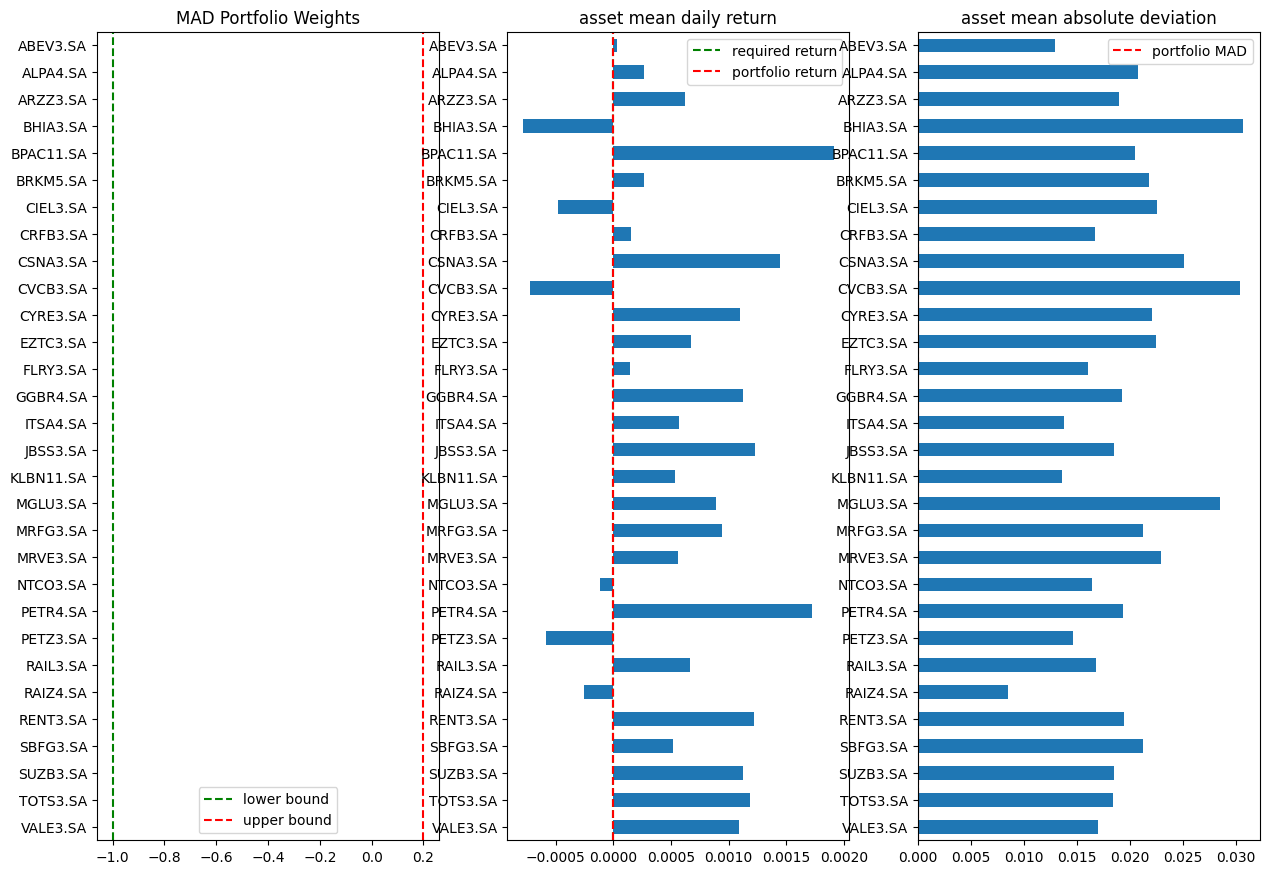

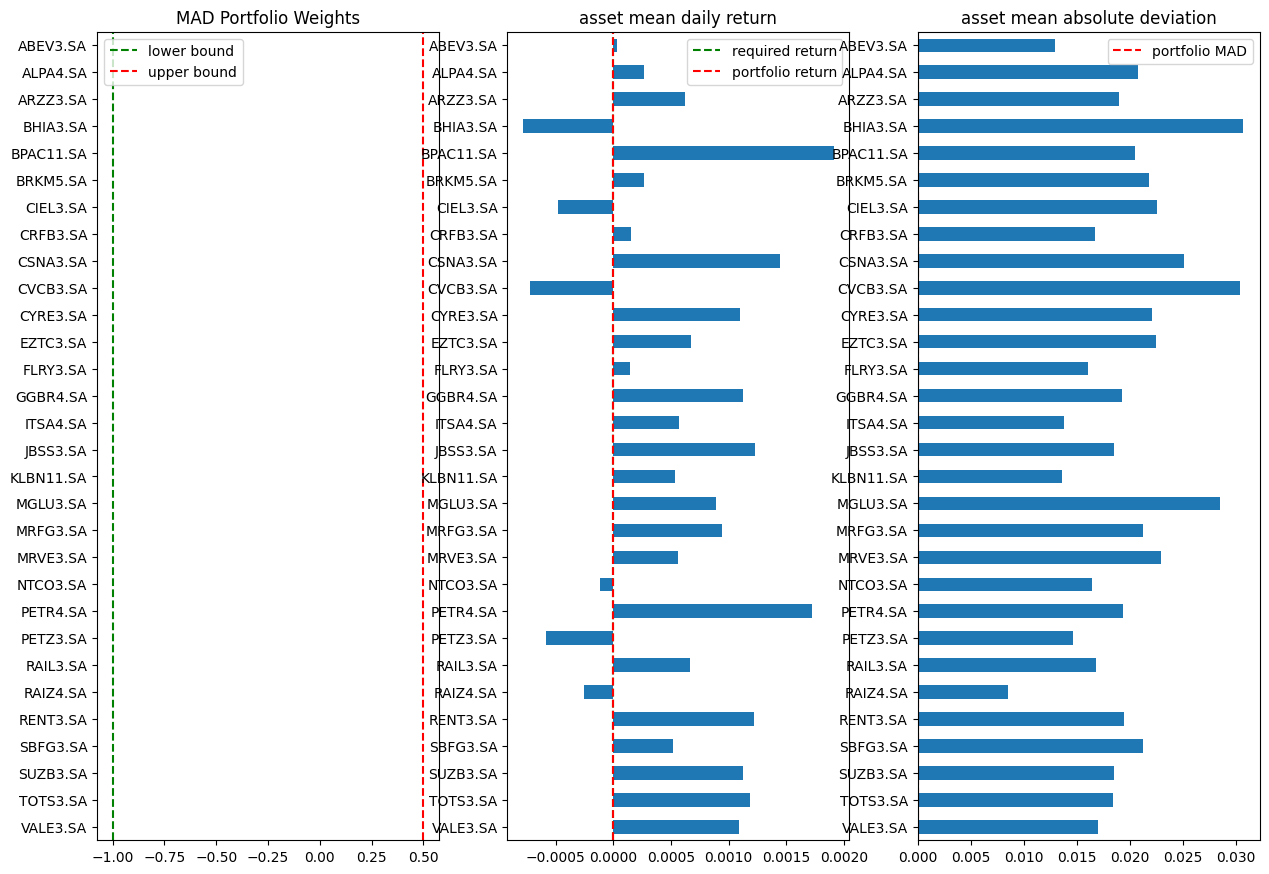

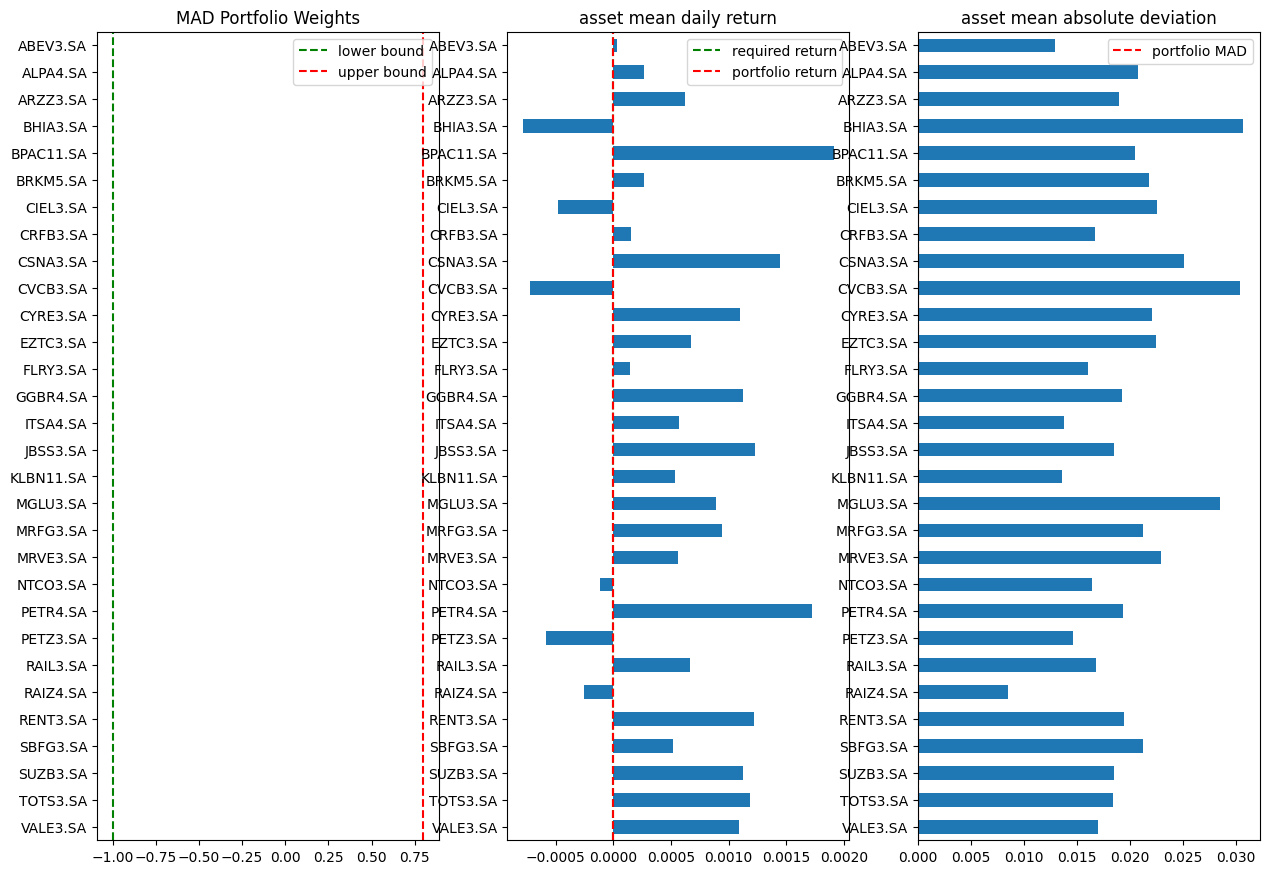

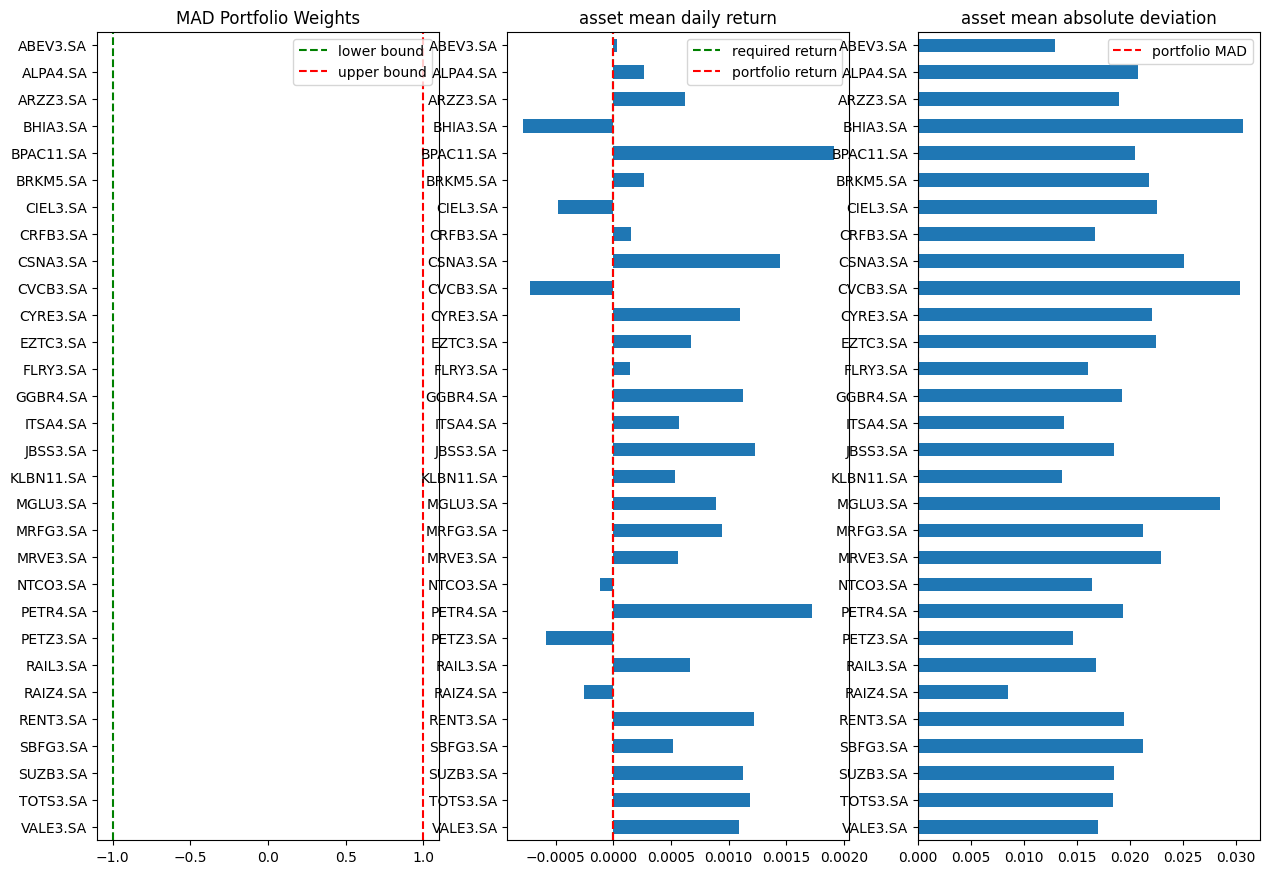

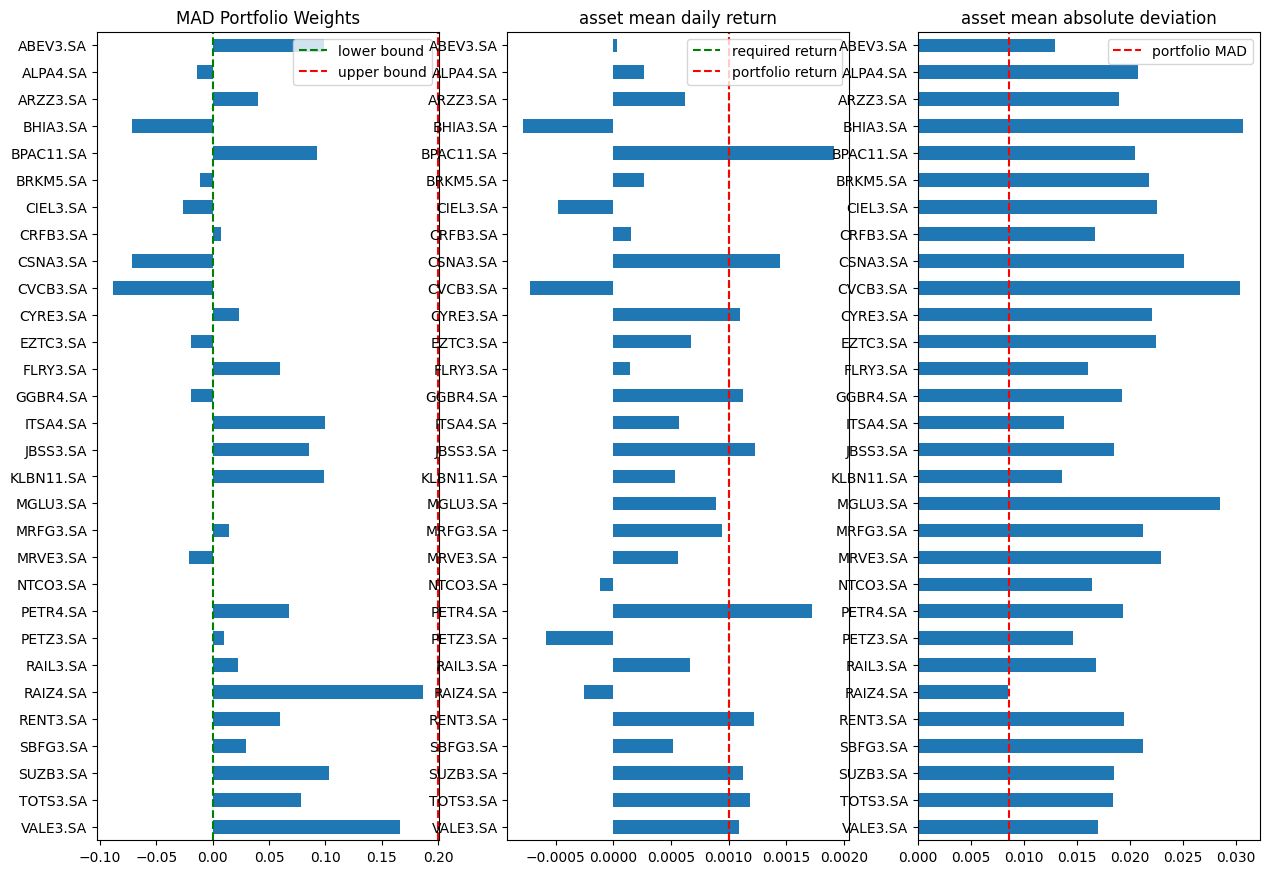

In [14]:
def mad_portfolio(assets):
    daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
    mean_return = daily_returns.mean()

    daily_returns["Date"] = daily_returns.index.format()
    daily_returns.set_index("Date", inplace=True)

    ampl = AMPL()
    ampl.read("mad_portfolio.mod")

    ampl.set["ASSETS"] = list(assets.columns)
    ampl.set["TIME"] = daily_returns.index.values

    ampl.param["daily_returns"] = daily_returns
    ampl.param["mean_return"] = mean_return

    return ampl


def mad_visualization(assets, m):
    mean_portfolio_return = m.get_value("sum{j in ASSETS}(w[j] * mean_return[j])")

    print(f"Weight lower bound                {m.param['w_lb'].value():0.3f}")
    print(f"Weight upper bound                {m.param['w_ub'].value():0.3f}")
    print(
        f"Fraction of portfolio invested     {m.get_value('sum{j in ASSETS} w[j]'):0.3f}"
    )
    print(f"Required portfolio daily return    {m.param['R'].value():0.5f}")
    print(f"Portfolio mean daily return        {mean_portfolio_return:0.5f}")
    print(f"Portfolio mean absolute deviation  {m.obj['MAD'].value():0.5f}")

    daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
    mean_return = daily_returns.mean()
    mean_absolute_deviation = abs(daily_returns - mean_return).mean()
    mad_portfolio_weights = m.var["w"].to_pandas()

    fig, ax = plt.subplots(1, 3, figsize=(15, 0.35 * len(daily_returns.columns)))
    mad_portfolio_weights.plot(kind="barh", ax=ax[0], title="MAD Portfolio Weights")
    ax[0].invert_yaxis()
    ax[0].axvline(m.param["w_lb"].value(), ls="--", color="g")
    ax[0].axvline(m.param["w_ub"].value(), ls="--", color="r")
    ax[0].legend(["lower bound", "upper bound"])

    mean_return.plot(kind="barh", ax=ax[1], title="asset mean daily return")
    ax[1].axvline(m.param["R"].value(), ls="--", color="g")

    ax[1].axvline(mean_portfolio_return, ls="--", color="r")
    ax[1].invert_yaxis()
    ax[1].legend(["required return", "portfolio return"])

    mean_absolute_deviation.plot(
        kind="barh", ax=ax[2], title="asset mean absolute deviation"
    )
    ax[2].axvline(m.obj["MAD"].value(), ls="--", color="r")
    ax[2].legend(["portfolio MAD"])
    ax[2].invert_yaxis()


# Loop para variar os limites superiores de diversificação
for diversification_limit in [0.2, 0.5, 0.8, 1.0]:
    # Configurar o modelo AMPL com o novo limitante superior de diversificação
    m = mad_portfolio(assets)
    m.param["w_ub"] = diversification_limit

    # Resolver o modelo
    m.solve()

    # Exibir resultados
    print(f"\nResultados para w_ub = {diversification_limit}:")
    mad_visualization(assets, m)


m = mad_portfolio(assets)
m.param["w_lb"] = 0
m.param["w_ub"] = 0.2
m.param["R"] = 0.001
m.option["solver"] = SOLVER
m.solve()
mad_visualization(assets, m)
plt.show()

HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008121611222
845 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008121611222
0 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008121611222
0 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008121611222
0 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008147738539
45 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008291394235
60 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008545986355
35 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008898515447
37 simplex iterations
0 barrier

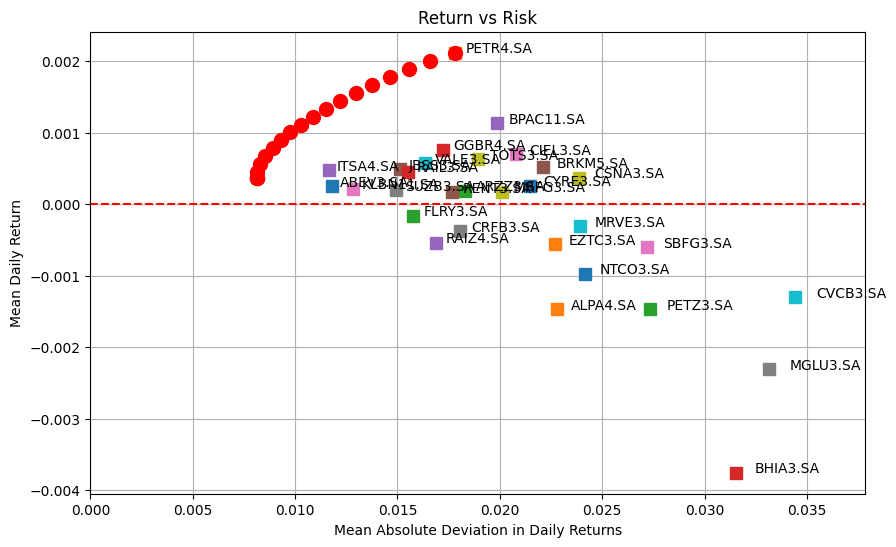

In [ ]:
# plot return vs risk
daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
mean_return = daily_returns.mean()
mean_absolute_deviation = abs(daily_returns - mean_return).mean()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for s in assets.keys():
    ax.plot(mean_absolute_deviation[s], mean_return[s], "s", ms=8)
    ax.text(mean_absolute_deviation[s] * 1.03, mean_return[s], s)

ax.set_xlim(0, 1.1 * max(mean_absolute_deviation))
ax.axhline(0, color="r", linestyle="--")
ax.set_title("Return vs Risk")
ax.set_xlabel("Mean Absolute Deviation in Daily Returns")
ax.set_ylabel("Mean Daily Return")
ax.grid(True)

m = mad_portfolio(assets)
for R in np.linspace(0, mean_return.max(), 20):
    m.param["R"] = R
    m.option["solver"] = SOLVER
    m.solve()
    mad_portfolio_weights = m.var["w"].to_pandas()
    portfolio_returns = daily_returns.dot(mad_portfolio_weights)
    portfolio_mean_return = portfolio_returns.mean()
    portfolio_mean_absolute_deviation = abs(
        portfolio_returns - portfolio_mean_return
    ).mean()
    ax.plot(portfolio_mean_absolute_deviation, portfolio_mean_return, "ro", ms=10)

In [13]:
%%writefile mad_portfolio_cash.mod

param R default 0;
param rf default 0;
param w_lb default 0;
param w_ub default 1;

set ASSETS;
set TIME;

param daily_returns{TIME, ASSETS};
param mean_return{ASSETS};

var w{ASSETS};
var u{TIME} >= 0;
var v{TIME} >= 0;

minimize MAD: sum{t in TIME}(u[t] + v[t]) / card(TIME);

s.t. portfolio_returns {t in TIME}:
    u[t] - v[t] == sum{j in ASSETS}(w[j] * (daily_returns[t, j] - mean_return[j]));

s.t. sum_of_weights: sum{j in ASSETS} w[j] <= 1;

s.t. mean_portfolio_return: sum{j in ASSETS}(w[j] * (mean_return[j] - rf)) >= R - rf;

s.t. no_short {j in ASSETS}: w[j] >= w_lb;

s.t. diversify {j in ASSETS}: w[j] <= w_ub;

Writing mad_portfolio_cash.mod


HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008015094977
1538 simplex iterations
0 barrier iterations
 
Weight lower bound                0.000
Weight upper bound                0.200
Fraction of portfolio invested     0.669
Required portfolio daily return    0.00100
Portfolio mean daily return        0.00100
Portfolio mean absolute deviation  0.00802


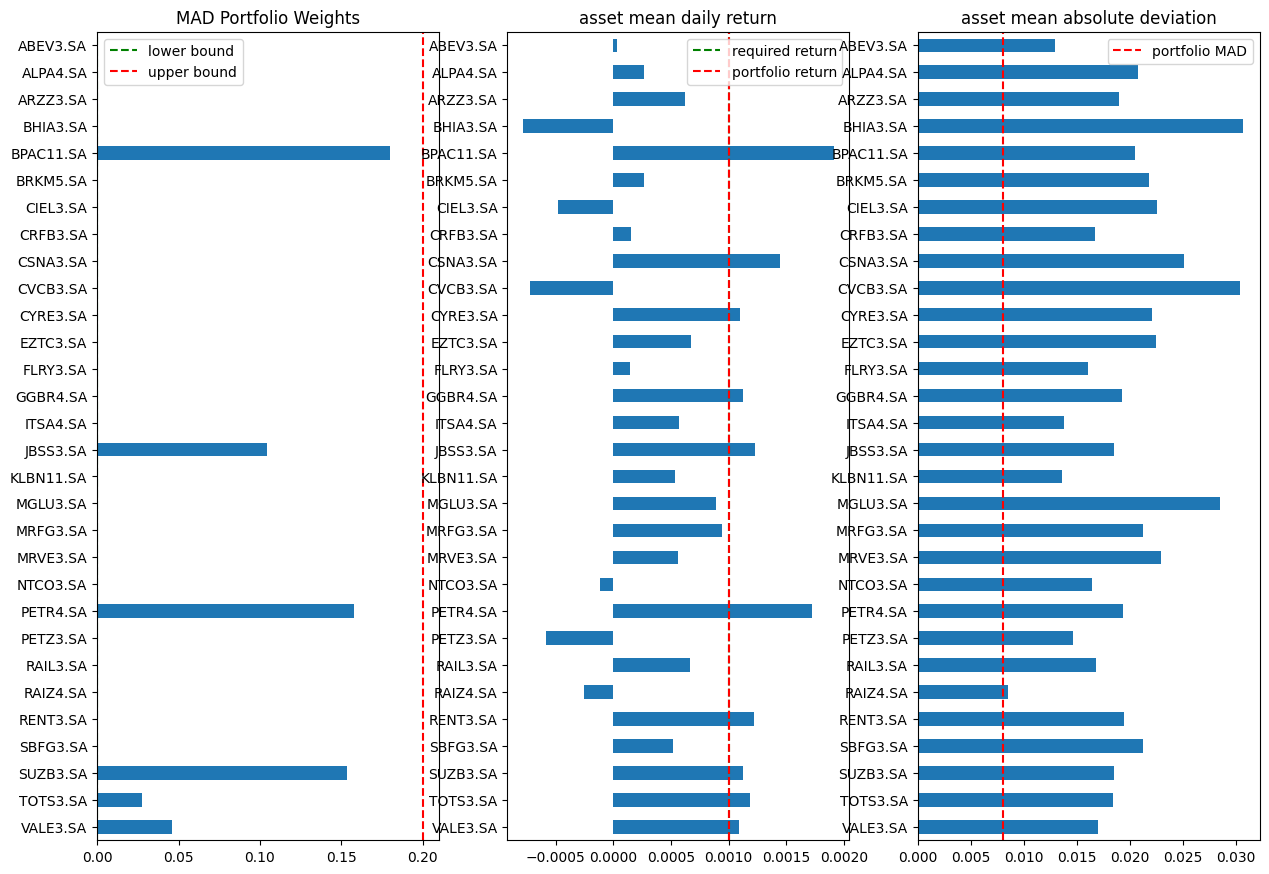

In [15]:
def mad_portfolio_cash(assets):
    daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
    mean_return = daily_returns.mean()

    daily_returns["Date"] = daily_returns.index.format()
    daily_returns.set_index("Date", inplace=True)

    ampl = AMPL()
    ampl.read("mad_portfolio_cash.mod")

    ampl.set["ASSETS"] = list(assets.columns)
    ampl.set["TIME"] = daily_returns.index.values

    ampl.param["daily_returns"] = daily_returns
    ampl.param["mean_return"] = mean_return

    return ampl


m = mad_portfolio_cash(assets)
m.param["w_lb"] = 0
m.param["w_ub"] = 0.2
m.param["R"] = 0.001
m.option["solver"] = SOLVER
m.solve()
mad_visualization(assets, m)

HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008121611222
845 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008121611222
0 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008121611222
0 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008121611222
0 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008147738539
45 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008291394235
60 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008545986355
35 simplex iterations
0 barrier iterations
 
HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008898515447
37 simplex iterations
0 barrier

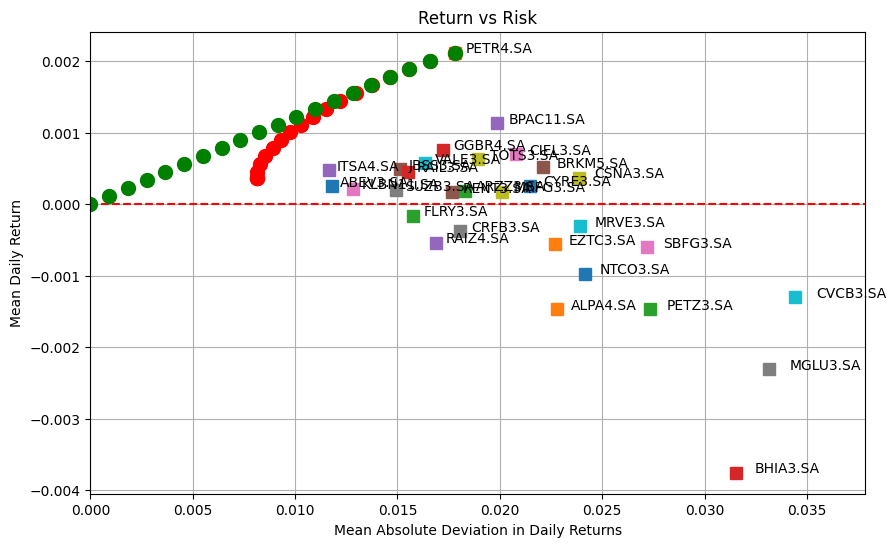

In [ ]:
# plot return vs risk
daily_returns = assets.diff()[1:] / assets.shift(1)[1:]
mean_return = daily_returns.mean()
mean_absolute_deviation = abs(daily_returns - mean_return).mean()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for s in assets.keys():
    ax.plot(mean_absolute_deviation[s], mean_return[s], "s", ms=8)
    ax.text(mean_absolute_deviation[s] * 1.03, mean_return[s], s)

ax.set_xlim(0, 1.1 * max(mean_absolute_deviation))
ax.axhline(0, color="r", linestyle="--")
ax.set_title("Return vs Risk")
ax.set_xlabel("Mean Absolute Deviation in Daily Returns")
ax.set_ylabel("Mean Daily Return")
ax.grid(True)

for color, m in zip(["ro", "go"], [mad_portfolio(assets), mad_portfolio_cash(assets)]):
    for R in np.linspace(0, mean_return.max(), 20):
        m.param["R"] = R
        m.option["solver"] = SOLVER
        m.solve()
        mad_portfolio_weights = m.var["w"].to_pandas()
        portfolio_returns = daily_returns.dot(mad_portfolio_weights)
        portfolio_mean_return = portfolio_returns.mean()
        portfolio_mean_absolute_deviation = abs(
            portfolio_returns - portfolio_mean_return
        ).mean()
        ax.plot(portfolio_mean_absolute_deviation, portfolio_mean_return, color, ms=10)

## **Realizar short selling**

In [17]:
%%writefile mad_portfolio.mod

param R default 0;
param w_lb default -1;  # Set a lower bound that allows short selling
param w_ub default 1;

set ASSETS;
set TIME;

param daily_returns{TIME, ASSETS};
param mean_return{ASSETS};

var w{ASSETS};
var u{TIME} >= 0;
var v{TIME} >= 0;

minimize MAD: sum{t in TIME}(u[t] + v[t]) / card(TIME);

s.t. portfolio_returns {t in TIME}:
    u[t] - v[t] == sum{j in ASSETS}(w[j] * (daily_returns[t, j] - mean_return[j]));

s.t. sum_of_weights: sum{j in ASSETS} w[j] == 1;

s.t. mean_portfolio_return: sum{j in ASSETS}(w[j] * mean_return[j]) >= R;

s.t. diversify {j in ASSETS}: w[j] <= w_ub;


Overwriting mad_portfolio.mod


HiGHS 1.6.0: HiGHS 1.6.0: optimal solution; objective 0.008634703415
2114 simplex iterations
0 barrier iterations
 
Weight lower bound                0.000
Weight upper bound                0.200
Fraction of portfolio invested     1.000
Required portfolio daily return    0.00100
Portfolio mean daily return        0.00100
Portfolio mean absolute deviation  0.00863


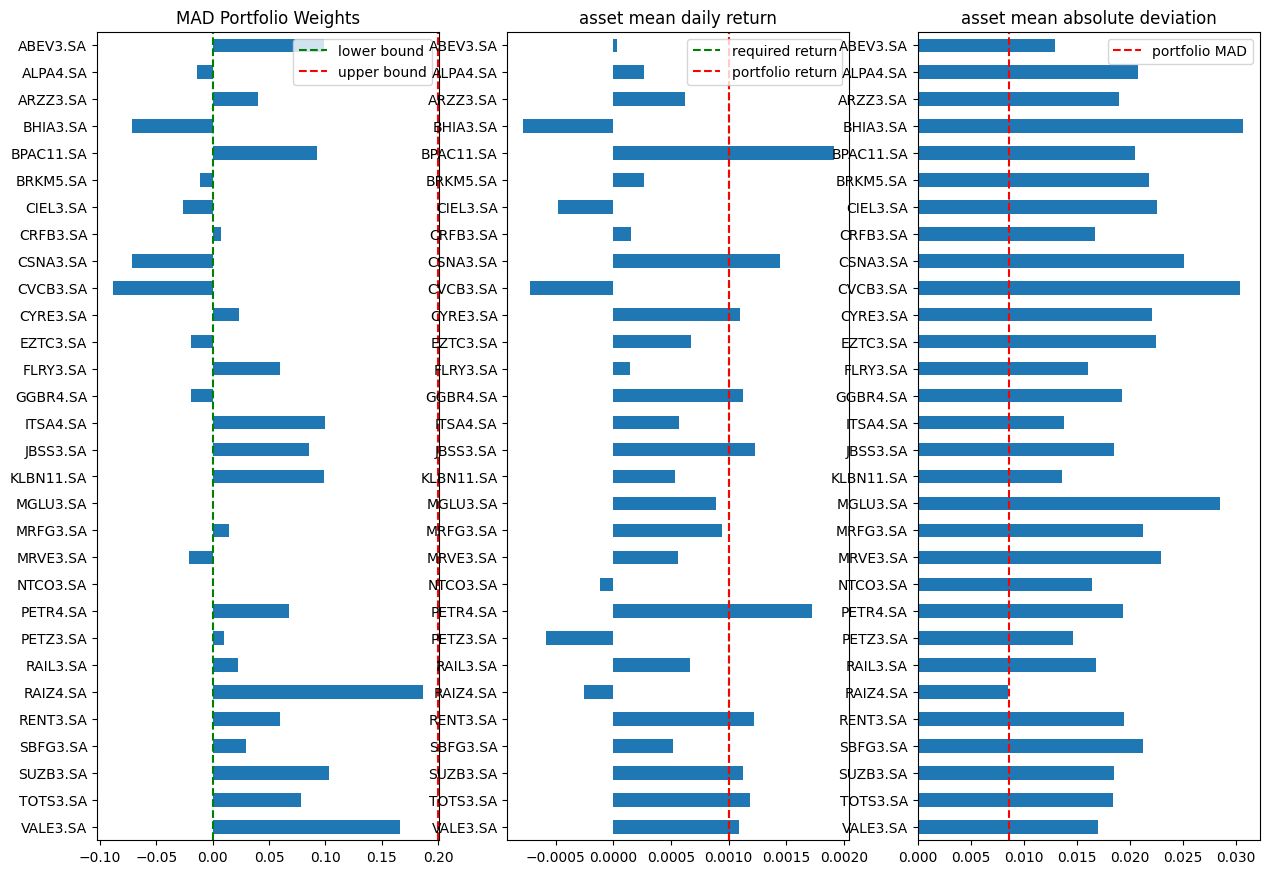

In [18]:
m = mad_portfolio(assets)
m.param["w_lb"] = 0
m.param["w_ub"] = 0.2
m.param["R"] = 0.001
m.option["solver"] = SOLVER
m.solve()
mad_visualization(assets, m)